In [1]:
import numpy as np

x = np.load(r"C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\res\data_for_ml_all_std_force_quality\x_for_ml.npy")
y = np.load(r"C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\res\data_for_ml_all_std_force_quality\y_for_ml.npy")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [4]:
import numpy as np
import keras
from keras import layers
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(12,)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13, activation="softmax"),
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              13312     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 13)                6

In [5]:
learning_rate = 0.0001
optimizer = keras.optimizers.Adam(
    learning_rate=learning_rate,
)
# Compile the model.
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc")
    ],
)

In [6]:
batch_size = 128
num_epochs = 500

# Create an early stopping callback.
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)
# Fit the model.
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=2,
)

_, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Epoch 1/500
1342/1342 - 7s - loss: 2.1622 - acc: 0.2715 - val_loss: 2.0568 - val_acc: 0.2941 - 7s/epoch - 5ms/step
Epoch 2/500
1342/1342 - 4s - loss: 2.0411 - acc: 0.2992 - val_loss: 1.9890 - val_acc: 0.3136 - 4s/epoch - 3ms/step
Epoch 3/500
1342/1342 - 4s - loss: 1.9897 - acc: 0.3150 - val_loss: 1.9469 - val_acc: 0.3285 - 4s/epoch - 3ms/step
Epoch 4/500
1342/1342 - 4s - loss: 1.9560 - acc: 0.3222 - val_loss: 1.9200 - val_acc: 0.3340 - 4s/epoch - 3ms/step
Epoch 5/500
1342/1342 - 4s - loss: 1.9334 - acc: 0.3294 - val_loss: 1.8998 - val_acc: 0.3407 - 4s/epoch - 3ms/step
Epoch 6/500
1342/1342 - 4s - loss: 1.9126 - acc: 0.3365 - val_loss: 1.8822 - val_acc: 0.3461 - 4s/epoch - 3ms/step
Epoch 7/500
1342/1342 - 4s - loss: 1.8976 - acc: 0.3409 - val_loss: 1.8673 - val_acc: 0.3493 - 4s/epoch - 3ms/step
Epoch 8/500
1342/1342 - 4s - loss: 1.8865 - acc: 0.3429 - val_loss: 1.8580 - val_acc: 0.3496 - 4s/epoch - 3ms/step
Epoch 9/500
1342/1342 - 4s - loss: 1.8760 - acc: 0.3462 - val_loss: 1.8503 - val

Test accuracy: 36.35%


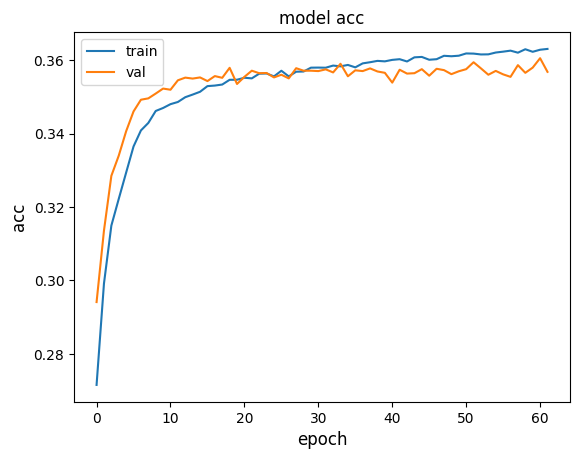

In [7]:
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
import matplotlib.pyplot as plt
metric = "acc"
plt.figure()
plt.plot(history.history[metric], label="train")
plt.plot(history.history["val_" + metric], label="val")
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend()
plt.show()
plt.close()

In [8]:
import pickle 

with open(r'C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\models\time_all_std_force_quality\MLP_time.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://5af531e9-09c5-44eb-92c6-965c3a26b6f3/assets


1491/1491 [==============================] - 2s 1ms/step


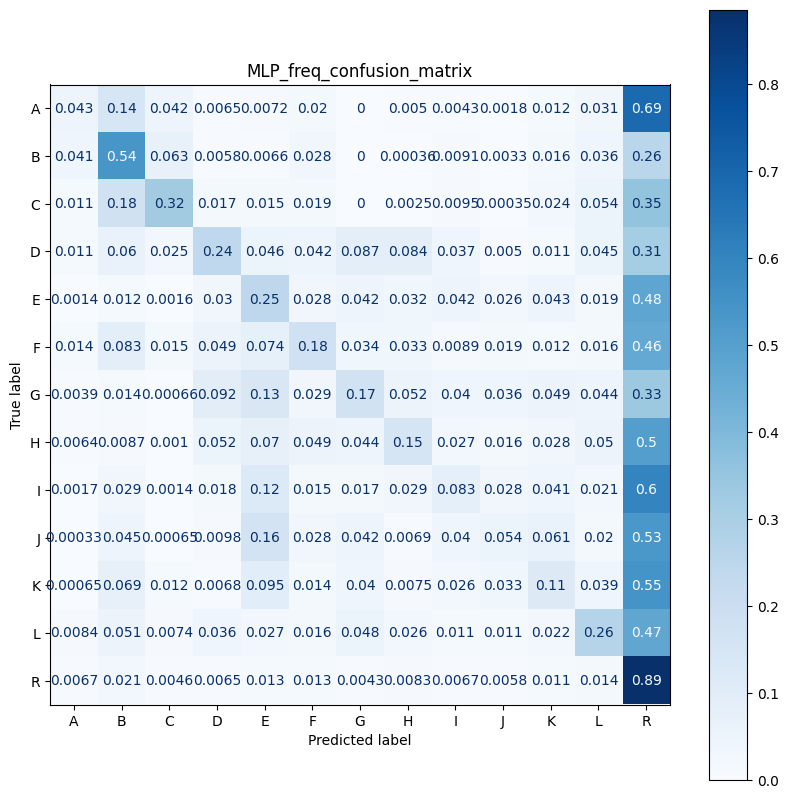

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
np.set_printoptions(precision=2)
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=lb.inverse_transform(range(0, 13)),
    cmap=plt.cm.Blues,
    normalize="true",
    ax=ax
)
disp.ax_.set_title("MLP_freq_confusion_matrix")

plt.show()

In [10]:
import numpy as np

x = np.load(r"C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\res\data_for_ml_all_std_force_quality_freq\x_for_ml.npy")
y = np.load(r"C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\res\data_for_ml_all_std_force_quality_freq\y_for_ml.npy")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
import numpy as np
import keras
from keras import layers
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(12,)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(13, activation="softmax"),
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              13312     
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 13)               

In [13]:
learning_rate = 0.0001
optimizer = keras.optimizers.Adam(
    learning_rate=learning_rate,
)
# Compile the model.
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc")
    ],
)

In [14]:
batch_size = 128
num_epochs = 500

# Create an early stopping callback.
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)
# Fit the model.
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=2,
)

_, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Epoch 1/500
1342/1342 - 5s - loss: 1.9969 - acc: 0.3227 - val_loss: 1.8321 - val_acc: 0.3693 - 5s/epoch - 4ms/step
Epoch 2/500
1342/1342 - 4s - loss: 1.8156 - acc: 0.3710 - val_loss: 1.7462 - val_acc: 0.3941 - 4s/epoch - 3ms/step
Epoch 3/500
1342/1342 - 4s - loss: 1.7531 - acc: 0.3921 - val_loss: 1.6979 - val_acc: 0.4057 - 4s/epoch - 3ms/step
Epoch 4/500
1342/1342 - 4s - loss: 1.7142 - acc: 0.4031 - val_loss: 1.6642 - val_acc: 0.4161 - 4s/epoch - 3ms/step
Epoch 5/500
1342/1342 - 4s - loss: 1.6852 - acc: 0.4123 - val_loss: 1.6356 - val_acc: 0.4249 - 4s/epoch - 3ms/step
Epoch 6/500
1342/1342 - 4s - loss: 1.6601 - acc: 0.4189 - val_loss: 1.6098 - val_acc: 0.4296 - 4s/epoch - 3ms/step
Epoch 7/500
1342/1342 - 4s - loss: 1.6391 - acc: 0.4245 - val_loss: 1.5928 - val_acc: 0.4360 - 4s/epoch - 3ms/step
Epoch 8/500
1342/1342 - 4s - loss: 1.6211 - acc: 0.4286 - val_loss: 1.5800 - val_acc: 0.4356 - 4s/epoch - 3ms/step
Epoch 9/500
1342/1342 - 4s - loss: 1.6082 - acc: 0.4324 - val_loss: 1.5606 - val

Test accuracy: 49.6%


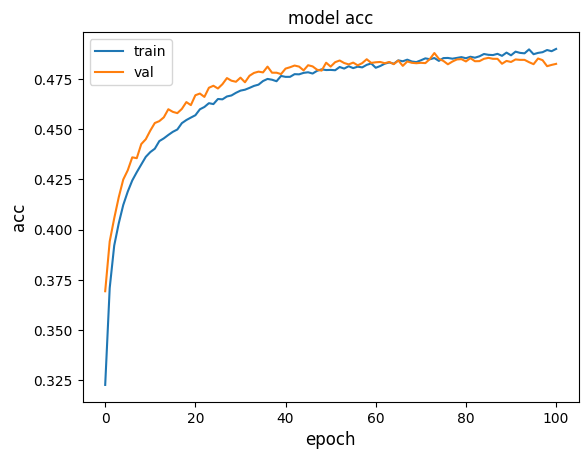

In [15]:
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
import matplotlib.pyplot as plt
metric = "acc"
plt.figure()
plt.plot(history.history[metric], label="train")
plt.plot(history.history["val_" + metric], label="val")
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend()
plt.show()
plt.close()

In [16]:
import pickle 

with open(r'C:\Users\AndreaEnrique\Documents\TFM_MBID_VIU\models\freq_all_std_force_quality\MLP_freq.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://b3df20cb-36ba-41bb-bd8f-ca86cc6dc8a5/assets


1491/1491 [==============================] - 2s 1ms/step


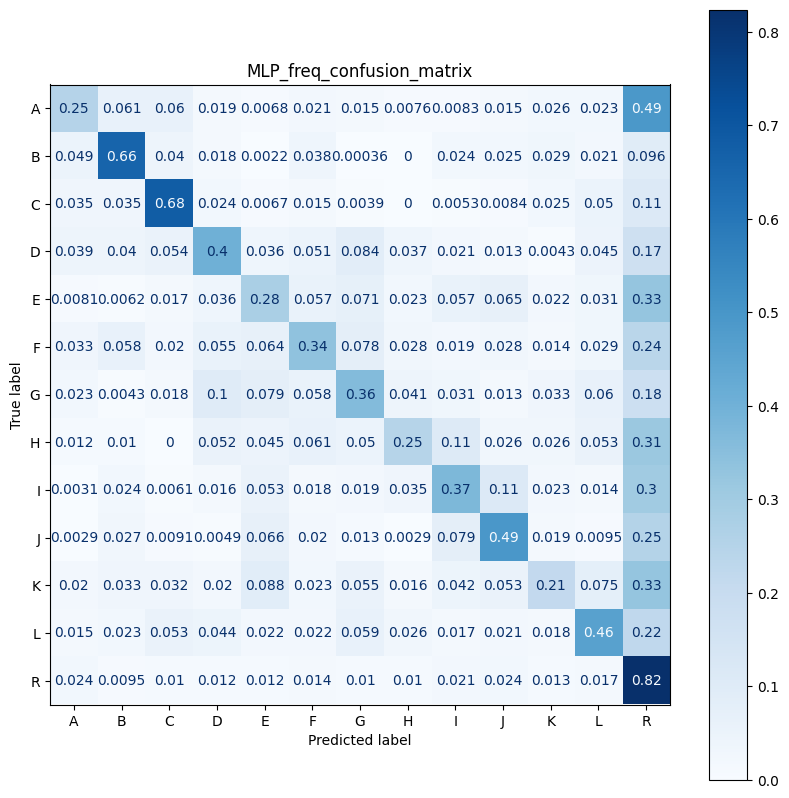

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
np.set_printoptions(precision=2)
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=lb.inverse_transform(range(0, 13)),
    cmap=plt.cm.Blues,
    normalize="true",
    ax=ax
)
disp.ax_.set_title("MLP_freq_confusion_matrix")

plt.show()